#### - Sobhan Moradian Daghigh
#### 
#### - 1/17/2022
#### 
#### - PR - EX03 - Q4 - All Parts

In [41]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from skimage.util import view_as_blocks
from sklearn.decomposition import PCA

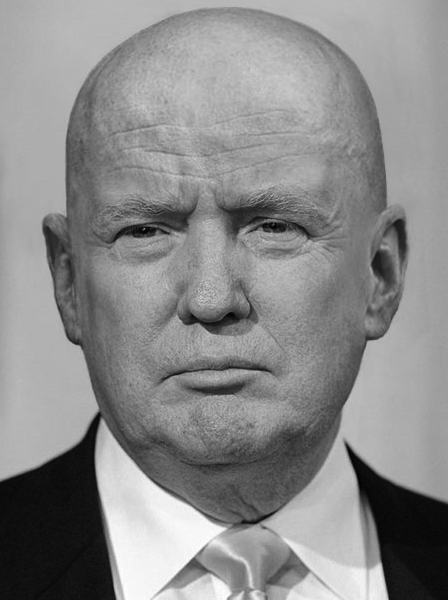

In [2]:
donald = Image.open('./inputs/P4/donald.png')
donald

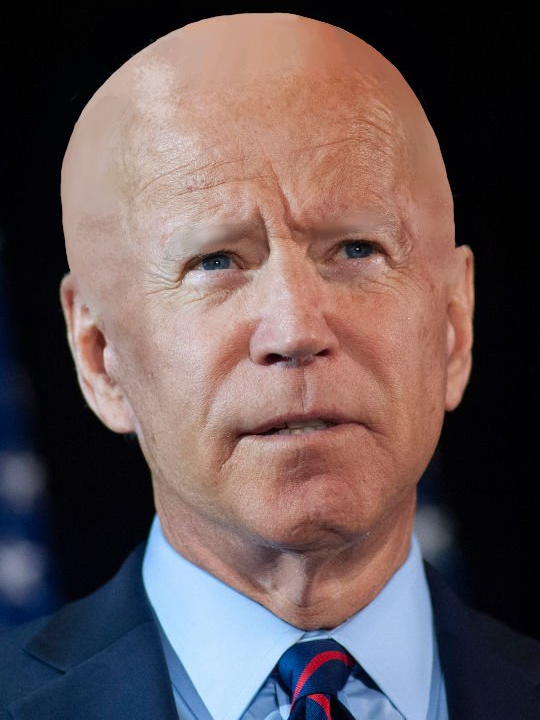

In [3]:
joe = Image.open('./inputs/P4/joe.png')
joe

### Part A.

In [4]:
donald = cv2.imread('./inputs/P4/donald.png')
joe = cv2.imread('./inputs/P4/joe.png')

In [5]:
patch_size = 8

In [35]:
def channel_merger(img):
    channels = []
    b, g, r = np.divide(cv2.split(img), 255)
    
    # Checking if a img is gray or color
    if ~((r == b).all() == True and (r == g).all() == True):
        return np.array([b, g, r])
    
    return np.array([b])

In [36]:
def reshaper(img):
    h, w = np.divmod(img.shape[:-1], patch_size)[0] * 8
    img = cv2.resize(img, (w, h))
    return img

In [37]:
def patch_extract(img):
    if ~(np.divmod(img.shape[:-1], patch_size)[1].any() == 0):
        img = reshaper(img)
    
    channels = channel_merger(img)
    # Using skimage to patching the images
    dataset = []
    for channel in channels:
        blocks = view_as_blocks(channel, block_shape=(patch_size, patch_size))
        for j in range(blocks.shape[1]):
            for i in range(blocks.shape[0]):
                dataset.append(blocks[i][j].reshape(patch_size ** 2))

    return pd.DataFrame(dataset)

In [38]:
dataset_donald = patch_extract(donald)
dataset_donald.shape

(4200, 64)

In [39]:
dataset_joe = patch_extract(joe)
dataset_joe.shape

(18090, 64)

### Part B.

In [40]:
dataset_donald.cov()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.043921,0.043638,0.042931,0.042156,0.041391,0.040613,0.039774,0.038767,0.043766,0.043580,...,0.038806,0.038137,0.040324,0.040448,0.040273,0.039934,0.039595,0.039136,0.038567,0.037877
1,0.043638,0.044060,0.043733,0.042986,0.042217,0.041446,0.040616,0.039612,0.043474,0.043872,...,0.039408,0.038793,0.039985,0.040289,0.040376,0.040243,0.040012,0.039635,0.039125,0.038497
2,0.042931,0.043733,0.044229,0.043910,0.043140,0.042350,0.041536,0.040503,0.042865,0.043597,...,0.040067,0.039494,0.039662,0.040097,0.040421,0.040525,0.040454,0.040197,0.039765,0.039181
3,0.042156,0.042986,0.043910,0.044352,0.043944,0.043136,0.042321,0.041293,0.042162,0.042965,...,0.040592,0.040082,0.039275,0.039787,0.040232,0.040488,0.040612,0.040576,0.040277,0.039733
4,0.041391,0.042217,0.043140,0.043944,0.044203,0.043722,0.042915,0.041882,0.041402,0.042232,...,0.040832,0.040413,0.038767,0.039337,0.039854,0.040219,0.040485,0.040633,0.040473,0.040008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.039934,0.040243,0.040525,0.040488,0.040219,0.039944,0.039550,0.038924,0.040602,0.040968,...,0.043111,0.042190,0.043487,0.044404,0.045282,0.045695,0.045280,0.044390,0.043506,0.042430
60,0.039595,0.040012,0.040454,0.040612,0.040485,0.040284,0.039941,0.039377,0.040222,0.040713,...,0.043733,0.042838,0.042708,0.043619,0.044503,0.045280,0.045566,0.045037,0.044169,0.043097
61,0.039136,0.039635,0.040197,0.040576,0.040633,0.040542,0.040278,0.039789,0.039717,0.040298,...,0.044263,0.043523,0.041847,0.042743,0.043611,0.044390,0.045037,0.045245,0.044793,0.043829
62,0.038567,0.039125,0.039765,0.040277,0.040473,0.040540,0.040430,0.040066,0.039099,0.039745,...,0.044483,0.044088,0.040977,0.041842,0.042716,0.043506,0.044169,0.044793,0.045109,0.044470


In [ ]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)